In [68]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

from tqdm import tqdm, trange
import os

## Utils

In [8]:
def load_images_from_folder(folder, size = (256, 256), start = 0, end = 100000):
    images = []
    for filename in os.listdir(folder)[start:end]:
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.resize(img, dsize = size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    return np.array(images)

## Perceptron

In [127]:
class Perceptron:
    def __init__(self, dim=2, lr = 1, max_epochs = 1000 ):
        self.w = np.zeros(dim)  # np.random.randn(dim)
        self.b = np.ones(1)  # bias
        self.max_epochs = max_epochs
        self.lr = lr  # learning rate
        self.dim = dim
        
    def fit(self, X, y):
        assert X.shape[1:] == self.dim, f"a sample in X must have the number of {self.dim} dimensions"
        assert X.shape[0] == y.shape[0], f"different number of samples in the dataset and labels"
        
        epoch = 0
        while(True):
            epoch+=1
            m = 0  # counter too se if we got a sample wrong
            for (xi, yi) in zip(X, y):
                if yi * (self.w.T @ xi + self.b) <= 0:  # <- If we get a sample wrong
                    self.w = self.w + self.lr * yi * xi  # <- We adjust the weight
                    self.b = self.b + self.lr * yi  # <- and the bias
                    m+=1  # <- count the wrong examples 
            if m == 0 or epoch == self.max_epochs:
                # If we get no mistakes or we finish our epochs break
                break
    
    def predict(self, X):
        return np.array([1 if (self.w.T @ xi + self.b) >= 0 else -1 for xi in X])
    
    
    def score(self, x, y):
        pass

# Data

In [120]:
dir_aug1 = os.path.join('..', 'Lab4', 'datasets', 'money', '1_aug')
dir_aug100 = os.path.join('..', 'Lab4', 'datasets', 'money', '100_aug')

In [83]:
X1 = load_images_from_folder(dir_aug1, size=(128, 128))
X100 = load_images_from_folder(dir_aug100, size = (128, 128))

In [84]:
y1 = np.ones(len(X1))
y100 = -np.ones(len(X100))

In [125]:
X = np.concatenate([X1, X100])
y = np.concatenate([y1, y100])
X = X.reshape((X.shape[0], np.prod(X.shape[1:])))

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420, shuffle=True)

In [129]:
perceptron = Perceptron(dim = X.shape[1:], lr = .2, max_epochs=1)

In [135]:
epochs = 100
accs = []
train_accs = []
for epoch in (t:= trange(epochs)):
    perceptron.fit(X_train, y_train)
    
    y_pred = perceptron.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    y_pred = perceptron.predict(X_train)
    tr_acc = accuracy_score(y_train, y_pred)
    
    train_accs.append(tr_acc)
    accs.append(acc)
    t.set_description(f"Accuracies: {round(tr_acc, 2), round(acc, 2)}")
    

Accuracies: (1.0, 0.75): 100%|███████| 100/100 [00:40<00:00,  2.46it/s]


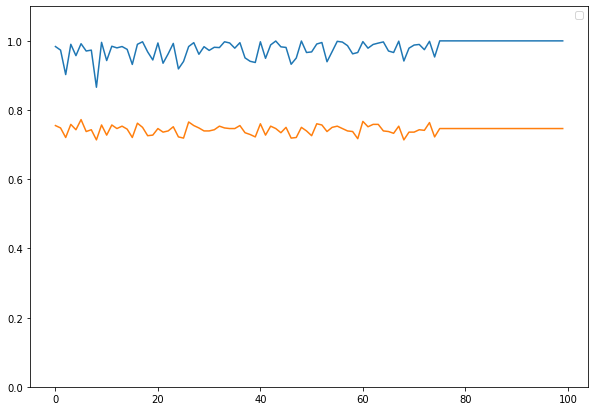

In [138]:
plt.figure(figsize = (10, 7))

plt.legend('Training')
plt.legend('Test')
plt.ylim(0, 1.1)
plt.plot(train_accs)
plt.plot(accs)
plt.show()

